<a href="https://colab.research.google.com/github/Sintapuspasari/Project-Mini/blob/main/Kelompok_6_Patuh_Protokol_Kesehatan_(facemask_detector).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>Computer Vision
# Kelompok 6 - Detektor Pemakai Masker dan Tanpa Masker

1. Ayu Tri Rahmawati             - Winning Eleven
2. Sonia Bintang                 - Winning Eleven
3. Vigia Rahayu Meilani          - Winning Eleven
4. Diki Wahyu Pratama            - Jumatec
5. Sinta Puspa Sari              - Jumatec
6. Laili Miftachur Rohmah        - Jumatec
7. Maulidia Nur Zahrotun Na`Imah - Jumatec

# 1. Problem Scoping

Adanya pandemi covid-19 membuat permintaan akan kebutuhan alat kesehatan meningkat khususnya masker. Himbauan dari pemerintah adalah patuh dengan protokol kesehatan khususnya memakai masker. Namun terkadang ada juga masyarakat yang mengabaikan memakai masker. Oleh karena itu, kami kelompok 6 memiliki ide mini project untuk membedakan orang yang memakai masker dan tanpa masker.

# 2. Data Acquisition

**Import Dataset**


Pertama kita upload dataset terlebih dahulu yang kami dapatkan dari kaggle. Datasetnya berupa file zip dan harus diekstrak dengan perintah **unzip**


link dataset : https://drive.google.com/file/d/1E1H1HU4Wmh2o1FE3M5K7Ifl3UbXr3Fvp/view?usp=sharing

In [ ]:
!unzip '/content/archive_9.zip'

Archive:  /content/archive_9.zip
replace dataset/incorrect_mask/aug_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: All
  inflating: dataset/incorrect_mask/aug_1.jpg  
  inflating: dataset/incorrect_mask/aug_10.jpg  
  inflating: dataset/incorrect_mask/aug_100.jpg  
  inflating: dataset/incorrect_mask/aug_101.jpg  
  inflating: dataset/incorrect_mask/aug_102.jpg  
  inflating: dataset/incorrect_mask/aug_103.jpg  
  inflating: dataset/incorrect_mask/aug_104.jpg  
  inflating: dataset/incorrect_mask/aug_105.jpg  
  inflating: dataset/incorrect_mask/aug_106.jpg  
  inflating: dataset/incorrect_mask/aug_107.jpg  
  inflating: dataset/incorrect_mask/aug_108.jpg  
  inflating: dataset/incorrect_mask/aug_11.jpg  
  inflating: dataset/incorrect_mask/aug_110.jpg  
  inflating: dataset/incorrect_mask/aug_111.jpg  
  inflating: dataset/incorrect_mask/aug_113.jpg  
  inflating: dataset/incorrect_mask/aug_114.jpg  
  inflating: dataset/incorrect_mask/aug_115.jpg  
  inflating: dataset/incorrect_mask/a

In [ ]:
# visualizing the data

import cv2

img = cv2.imread("29-with-mask.jpg")

img.shape

(428, 320, 3)

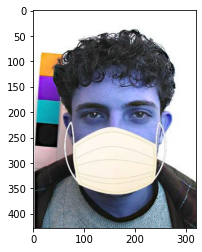

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

## Data Exploration

In [ ]:
dir = "dataset"

In [ ]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.02
                                                            )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                           validation_split = 0.2
                                                           )


In [ ]:
train_data = train_gen.flow_from_directory(dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(dir,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )


Found 2039 images belonging to 3 classes.
Found 415 images belonging to 3 classes.


In [ ]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

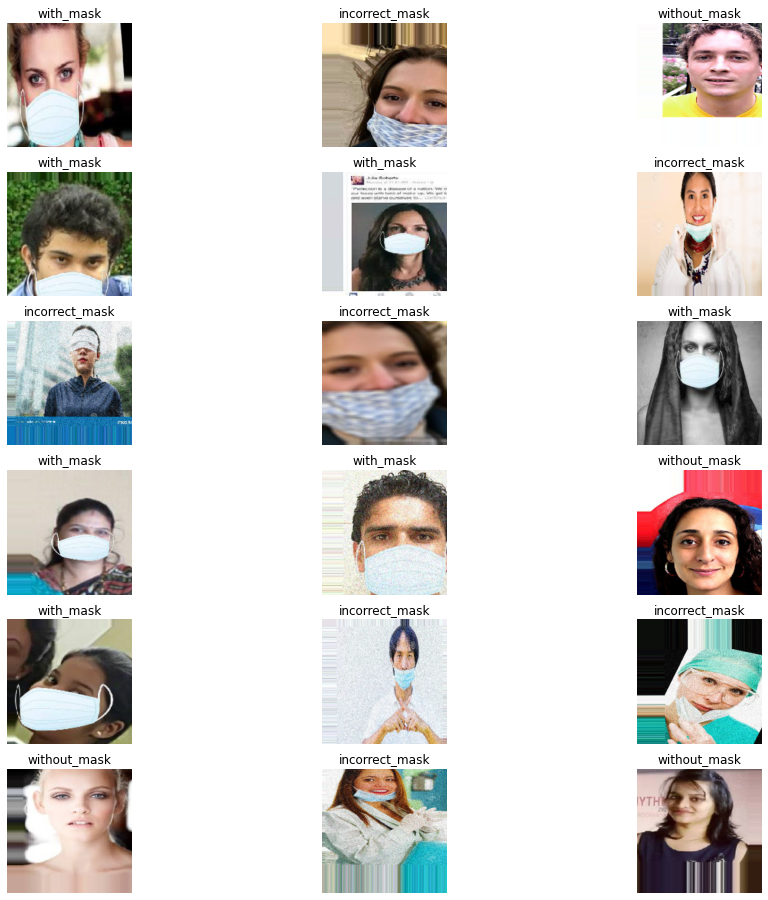

In [ ]:
# visualizing the train dataset

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize = (16,16))

for i in range(18):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")


# 4. Modelling

In [ ]:
# Building a CNN model 
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [ ]:
# compiling the model

model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [ ]:




# fitting data to the model

model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/5
64/64 [==============================] - 197s 3s/step - loss: 1.0127 - accuracy: 0.5184 - val_loss: 0.5385 - val_accuracy: 0.8265
Epoch 2/5
64/64 [==============================] - 195s 3s/step - loss: 0.6467 - accuracy: 0.7170 - val_loss: 0.3799 - val_accuracy: 0.8361
Epoch 3/5
64/64 [==============================] - 196s 3s/step - loss: 0.5235 - accuracy: 0.8024 - val_loss: 0.2816 - val_accuracy: 0.9133
Epoch 4/5
64/64 [==============================] - 195s 3s/step - loss: 0.4685 - accuracy: 0.8347 - val_loss: 0.3056 - val_accuracy: 0.8964
Epoch 5/5
64/64 [==============================] - 195s 3s/step - loss: 0.4452 - accuracy: 0.8337 - val_loss: 0.2059 - val_accuracy: 0.9277


# 5. Evaluation

In [ ]:
model_evaluation = model.evaluate(test_data)

13/13 [==============================] - 11s 787ms/step - loss: 0.2059 - accuracy: 0.9277


In [ ]:
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

Model Accuracy:  92.77 %


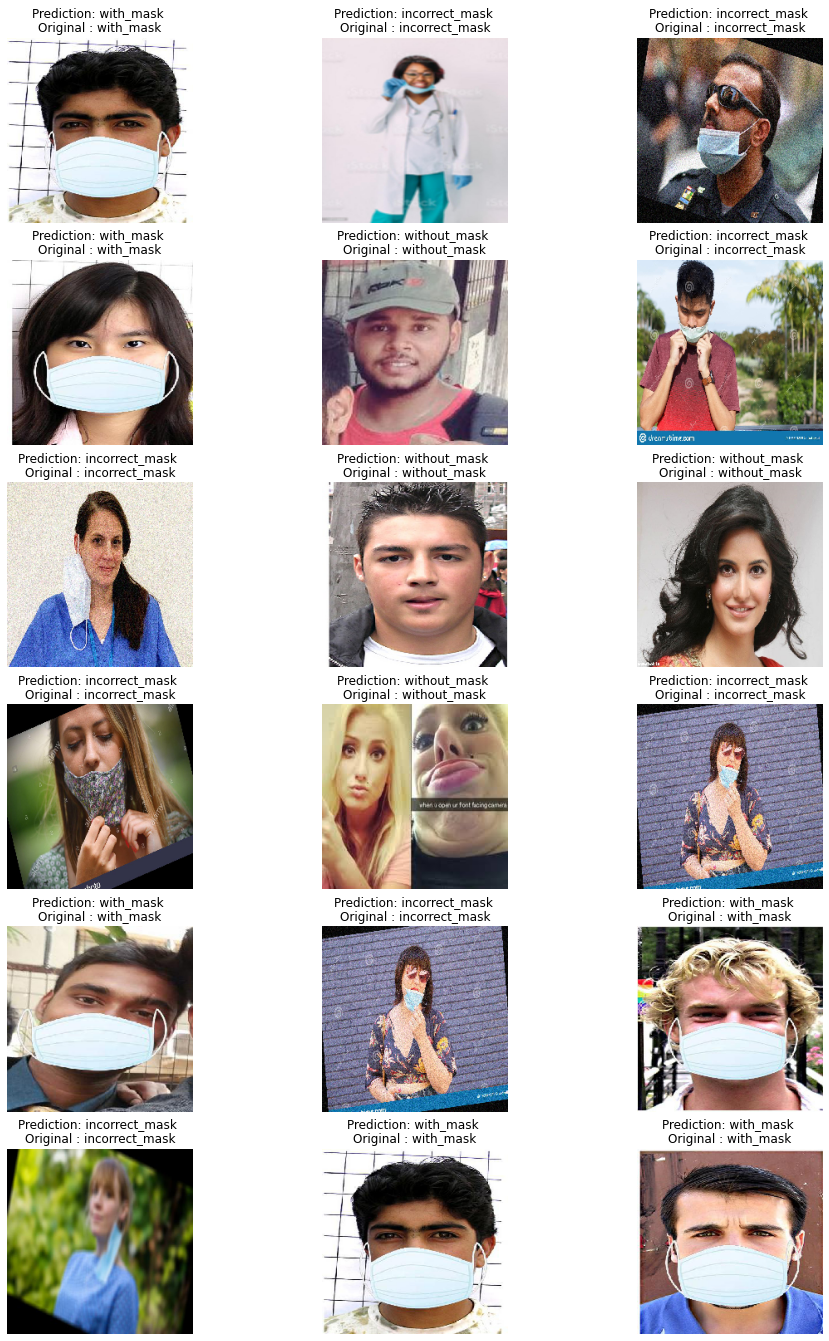

In [ ]:
# visualizing the test data

import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")
